In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

db = pd.read_csv('DiZyme.csv')
di2 = {'TMB':1.0, 'H2O2':2.0, 'ABTS': 3.0, 'OPD': 4.0, 'DAB':5.0, 'BA':6.0}
db['Subtype'].replace(di2, inplace=True)
x = db.loc[:,'Syngony':'volume'].values
y = db.loc[:,'Kcat'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

y_train =np.log10(y_train)
y_test = np.log10(y_test)

from sklearn.svm import SVR
regressor = SVR(C= 95, gamma= 22, degree= 2, kernel= 'rbf')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y1_pred = regressor.predict(x_train)

Q2: -0.9850604881783678
r2_test: 0.6928141345866322
MAE_test: 1.010728181539431
MSE_test: 1.7649139009104122
RMSE_test: 1.3285006213436306
r2_train: 0.9699140892461462
MAE_train: 0.1834927426875421
MSE_train: 0.17321527638765247
RMSE_train: 0.4161913939375158


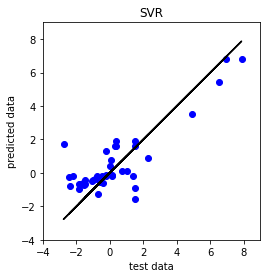

In [6]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                        scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
plt.scatter(y_test, y_pred, color = 'blue')
plt.plot(y_test, y_test, color = 'black')
plt.title('SVR')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(-4, 9)
plt.ylim(-4, 9)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

db = pd.read_csv('DiZymePred.csv')
di2 = {'TMB':1.0, 'H2O2':2.0, 'ABTS': 3.0, 'OPD': 4.0, 'DAB':5.0, 'BA':6.0}
db['Subtype'].replace(di2, inplace=True)
x = db.loc[:,'Syngony':'Ccat'].values
y = db.loc[:,'Km'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

y_train =np.log10(y_train)
y_test = np.log10(y_test)

from sklearn.svm import SVR
regressor = SVR(C= 95, gamma= 22, degree= 2, kernel= 'rbf')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y1_pred = regressor.predict(x_train)

Q2: -0.780252851455228
r2_test: 0.3370558129440874
MAE_test: 0.7630155499681144
MSE_test: 1.09081312274399
RMSE_test: 1.0444199934623952
r2_train: 0.9828431100914737
MAE_train: 0.11647466914704296
MSE_train: 0.023580014827687002
RMSE_train: 0.1535578549853019


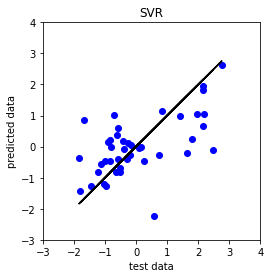

In [8]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                        scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
plt.scatter(y_test, y_pred, color = 'blue')
plt.plot(y_test, y_test, color = 'black')
plt.title('SVR')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(-3, 4)
plt.ylim(-3, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()